# 1 线性回归图

用于展示数据点与回归直线之间关系的可视化图表，拟合一条直线建模自变量与因变量之间的线性关系

## 1.1 回归基本概念

自变量X与因变脸Y存在如下线性关系

$$
Y = beta_0 + beta_l * X + e
$$

- e:误差
- β0：截距
- βl：斜率，回归系数

图像构成：回归拟合曲线（最小化数据点到回归直线的垂直距离之和）+数据点

## 1.3 适用场景

- 可视化趋势：
- 判断拟合效果
- 预测


## 1.4 sns.regplot()

- x:
- y:
- data:
- scatter:bool值,是否绘制散点
- order：回归线的多项式阶数
- ci：置信区间大小
- fit_reg:控制是否绘制回归线
- color：绘图颜色
- scatter_kws：设置散点样式
- line_kws:设置回归线样式

## 1.5 案例


In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joypy
import warnings

# 忽略警告
warnings.filterwarnings('ignore')
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<Axes: xlabel='total_bill', ylabel='tip'>

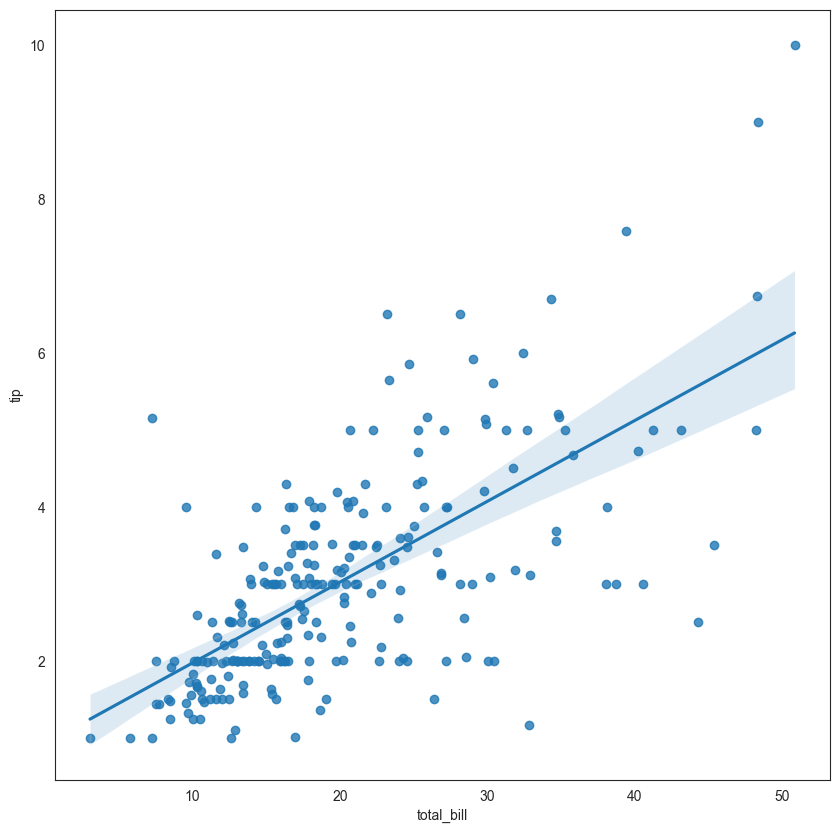

In [2]:
sns.set_style("white")
plt.figure(figsize=(10,10))

sns.regplot(data=tips, x="total_bill", y="tip")

<Axes: xlabel='total_bill', ylabel='tip'>

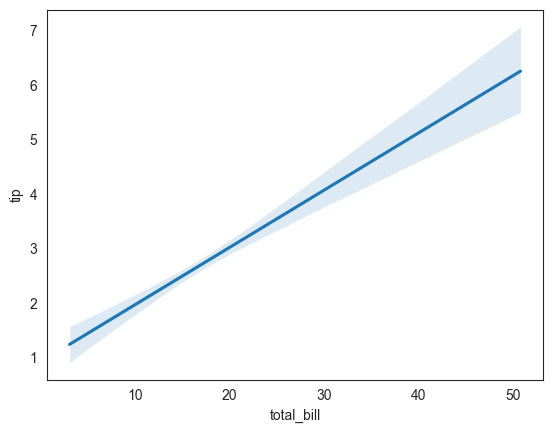

In [3]:
sns.regplot(data=tips, x="total_bill", y="tip",scatter=False)

<Axes: xlabel='total_bill', ylabel='tip'>

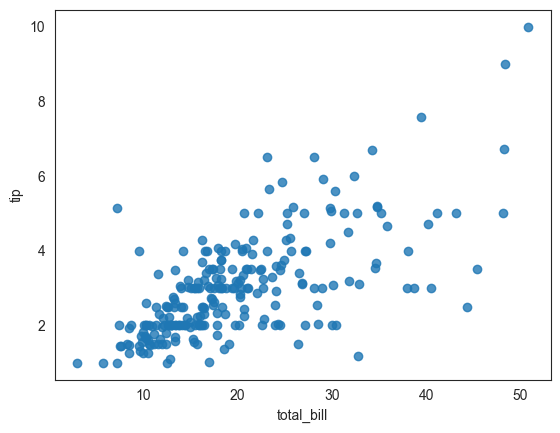

In [4]:
sns.regplot(data=tips, x="total_bill", y="tip",fit_reg=False)

<Axes: xlabel='total_bill', ylabel='tip'>

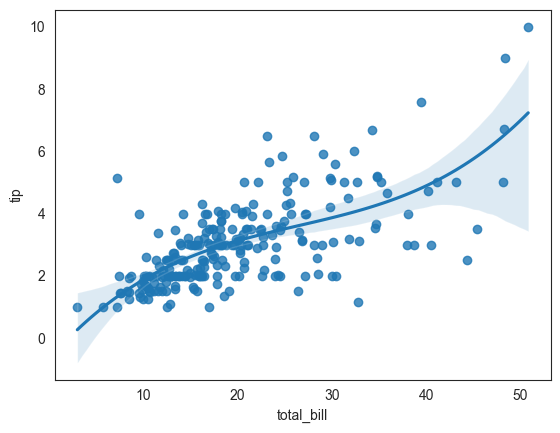

In [6]:
sns.regplot(data=tips, x="total_bill", y="tip",order=3)

<Axes: xlabel='total_bill', ylabel='tip'>

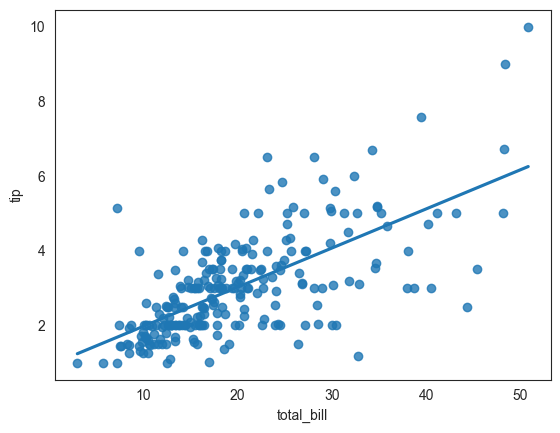

In [8]:
# ci=None不需要置信区间
sns.regplot(data=tips, x="total_bill", y="tip",ci=0.95)

### 1.3.2 color设置颜色

颜色清单

![](../picture/B-kdeplot-1.png)


### 1.3.3 设置线条格式和点格式

![img](../picture/B-regplot-1.png)

<Axes: xlabel='total_bill', ylabel='tip'>

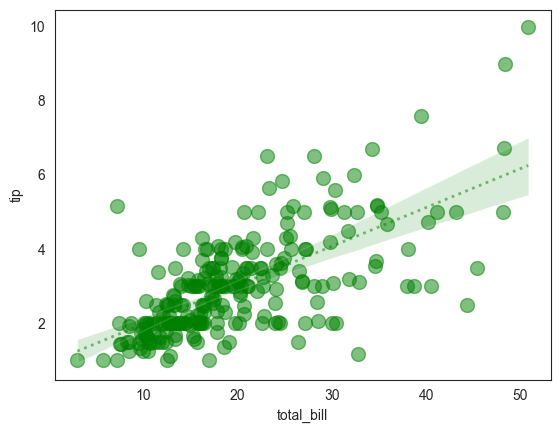

In [9]:
# 点格式 s大小，color颜色，alpha透明度
sns.regplot(data=tips, x="total_bill", y="tip",color="red",
            scatter_kws={"s": 100,'color':'green','alpha':0.5},
            line_kws={'color':'green','alpha':0.5,'ls':':','lw':2})